Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.4196 - val_loss: 0.7235
Epoch 2/100
1/1 [==============================] - 0s 86ms/step - loss: 0.3454 - val_loss: 0.5883
Epoch 3/100
1/1 [==============================] - 0s 78ms/step - loss: 0.2770 - val_loss: 0.4617
Epoch 4/100
1/1 [==============================] - 0s 72ms/step - loss: 0.2148 - val_loss: 0.3466
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 0.1591 - val_loss: 0.2426
Epoch 6/100
1/1 [==============================] - 0s 75ms/step - loss: 0.1101 - val_loss: 0.1529
Epoch 7/100
1/1 [==============================] - 0s 77ms/step - loss: 0.0694 - val_loss: 0.0801
Epoch 8/100
1/1 [==============================] - 0s 74ms/step - loss: 0.0385 - val_loss: 0.0275
Epoch 9/100
1/1 [==============================] - 0s 67ms/step - loss: 0.0193 - val_loss: 0.0019
Epoch 10/100
1/1 [==============================] - 0s 72ms/step - loss: 0.0145 - val_loss: 0.0074
Epoch 11/100
1/1 [===

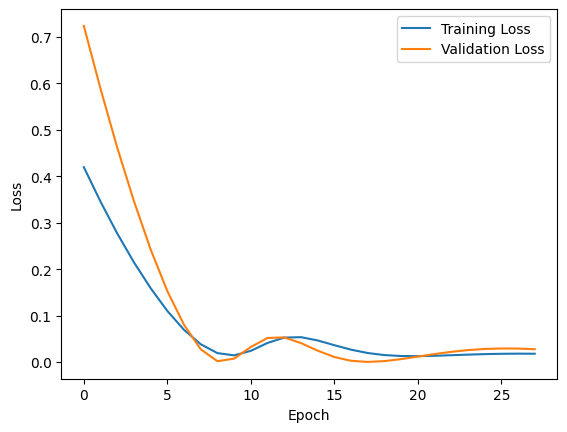

1/1 [==============================] - 0s 373ms/step


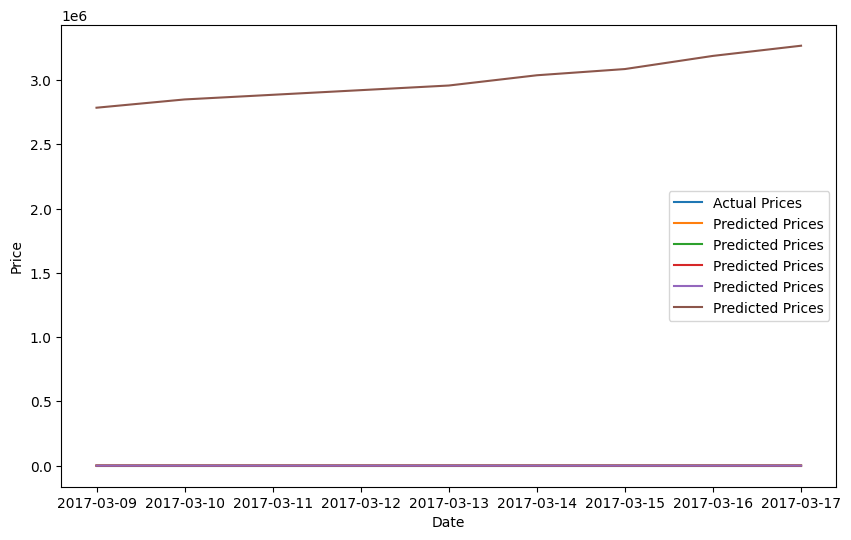

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv('goog.csv')  # Replace with the actual path to your dataset
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define the time steps
time_steps = 30

# Create sequences for LSTM training
X = []
y = []

for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps])
    y.append(data_scaled[i+time_steps, 3])  # Using 'Close' price for prediction

X = np.array(X)
y = np.array(y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, data_scaled.shape[1])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, batch_size=32, callbacks=[early_stopping])

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the test set
predicted_prices_scaled = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.hstack((X_test[:, -1, :-1], predicted_prices_scaled)))

# Plot the actual vs. predicted prices
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(data.index[-len(y_test):], predicted_prices, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
